# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading dataset

In [2]:
data = pd.read_csv('online_shoppers_intention.csv')

In [3]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
data1 = data.copy()

# Encoding the Categorical Columns to Numerical

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
LB = LabelEncoder()

In [7]:
data1['Month'] = LB.fit_transform(data['Month'])
data1['VisitorType'] = LB.fit_transform(data['VisitorType'])
data1['Weekend'] = LB.fit_transform(data['Weekend'])
data1['Revenue'] = LB.fit_transform(data['Revenue'])

In [8]:
data1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


# Scaling the data

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()
sc_data = sc.fit_transform(data1)
sc_data = pd.DataFrame(sc_data,columns=data1.columns)

In [11]:
sc_data.drop('Revenue',axis=1,inplace=True)

# Clustering

In [12]:
from sklearn.cluster import KMeans

In [13]:
cluster_errors = []
k_mean = []

In [14]:
cluster_errors = []
k_mean = []
for i in range(1,10):
    clusters=KMeans(n_clusters=i).fit(sc_data)
    k_mean.append(i)
    cluster_errors.append(clusters.inertia_)

In [15]:
df =pd.DataFrame({'k_mean':k_mean,
                  'cluster_errors':cluster_errors})

In [16]:
df

,k_mean,cluster_errors
0,1,209610.000000
1,2,185774.359498
2,3,166000.438012
3,4,153941.869174
4,5,146431.580565
5,6,137263.278549
6,7,130858.851277
7,8,123880.921216
8,9,119633.257531


# Visualing using Elbow plot for optimal cluster size

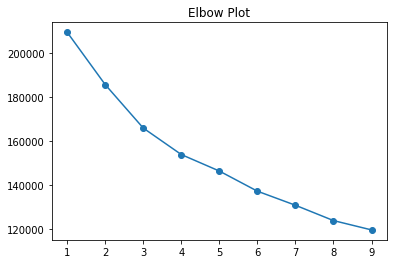

In [19]:
plt.plot(df['k_mean'],df['cluster_errors'],'o-')
plt.title('Elbow Plot')
plt.show()

From the above Elbow plot we can able to say the optimal cluster size for this data is 3

### Setting the cluster as 3

In [20]:
models = KMeans(n_clusters=3).fit(sc_data)

In [21]:
models.labels_

array([2, 1, 2, ..., 1, 1, 1])

In [22]:
models

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
pred = pd.DataFrame(models.predict(sc_data))

In [24]:
data1.Revenue.value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [25]:
pred[0].value_counts()

1    9654
0    1613
2    1063
Name: 0, dtype: int64

# Inference :
            From the count of new predicted clusters there is no much varaiation.
            If we combine 0 and 1 the counts become almost equal to the original values of label 0
            We have to cluster the label 1 again to see the varaiations

In [26]:
sc_data['new'] = pred

In [27]:
sc_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,new
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.334959,-1.233426,-0.790293,-0.894178,-0.762629,0.407786,-0.550552,2
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-1.334959,-0.136078,-0.207952,-0.894178,-0.514182,0.407786,-0.550552,1
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.334959,2.058618,-0.790293,2.437081,-0.265735,0.407786,-0.550552,2
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,-1.334959,0.961270,-0.207952,-0.477771,-0.017289,0.407786,-0.550552,2
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,-1.334959,0.961270,0.374389,-0.894178,-0.017289,0.407786,1.816360,1


### Separating the clusters

In [43]:
dat2 = sc_data[sc_data['new'] == 1]
dat01 = sc_data[sc_data['new'] != 1]

In [44]:
dat2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,new
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-1.334959,-0.136078,-0.207952,-0.894178,-0.514182,0.407786,-0.550552,1
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,-1.334959,0.961270,0.374389,-0.894178,-0.017289,0.407786,1.816360,1
5,-0.696993,-0.457191,-0.396478,-0.244931,-0.286270,-0.543757,-0.132035,-0.380935,-0.317178,-0.308821,-1.334959,-0.136078,-0.207952,-0.894178,-0.265735,0.407786,-0.550552,1
8,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.605012,-0.457683,1.171473,-0.317178,3.713114,-1.334959,-0.136078,-0.207952,-0.477771,-0.265735,0.407786,-0.550552,1
9,-0.696993,-0.457191,-0.396478,-0.244931,-0.646033,-0.238685,-0.457683,-0.429072,-0.317178,1.702146,-1.334959,-0.136078,0.956730,-0.894178,-0.514182,0.407786,-0.550552,1


In [45]:
dat01.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,new
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.334959,-1.233426,-0.790293,-0.894178,-0.762629,0.407786,-0.550552,2
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.334959,2.058618,-0.790293,2.437081,-0.265735,0.407786,-0.550552,2
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,-1.334959,0.961270,-0.207952,-0.477771,-0.017289,0.407786,-0.550552,2
6,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,1.702146,-1.334959,-0.136078,0.956730,-0.061364,-0.265735,0.407786,-0.550552,2
7,-0.395938,-0.457191,-0.396478,-0.244931,-0.713488,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.334959,-1.233426,-0.207952,-0.894178,0.231158,0.407786,1.816360,2


In [46]:
dat2.drop('new',axis=1,inplace=True)

In [47]:
cluster_errors = []
k_mean = []

In [48]:
cluster_errors = []
k_mean = []
for i in range(1,10):
    clusters=KMeans(n_clusters=i).fit(dat2)
    k_mean.append(i)
    cluster_errors.append(clusters.inertia_)

In [49]:
df =pd.DataFrame({'k_mean':k_mean,
                  'cluster_errors':cluster_errors})

In [50]:
df

,k_mean,cluster_errors
0,1,108323.152454
1,2,96512.053429
2,3,88598.104861
3,4,82180.159223
4,5,75149.277112
5,6,70790.401590
6,7,66478.140152
7,8,62617.881967
8,9,59076.035008


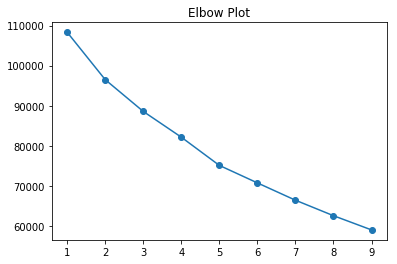

In [51]:
plt.plot(df['k_mean'],df['cluster_errors'],'o-')
plt.title('Elbow Plot')
plt.show()

The optimal cluster size is 5 for this one too

In [54]:
models = KMeans(n_clusters=5).fit(dat2)

In [55]:
models.labels_

array([3, 3, 3, ..., 1, 1, 2])

In [56]:
models

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [57]:
pred = models.predict(dat2)

In [58]:
p = pd.DataFrame(pred)
p[0].value_counts()

1    5307
3    1673
2    1515
0     783
4     376
Name: 0, dtype: int64

# Inference :
        The larger part of the before cluster is splitted into groups again
        This variation is also not much useful

In [59]:
dat2['new'] = pred

In [60]:
dat2['new'].value_counts()

1    5307
3    1673
2    1515
0     783
4     376
Name: new, dtype: int64

In [63]:
dat01['new'].replace({0:5,2:6},inplace=True)

In [64]:
dat01['new'].value_counts()

5    1613
6    1063
Name: new, dtype: int64

In [65]:
res = pd.concat([dat01,dat2])

In [66]:
res['new'].value_counts()

1    5307
3    1673
5    1613
2    1515
6    1063
0     783
4     376
Name: new, dtype: int64

## Now there are 6 labels in the output lets try to fit it in the model and check the accuaracy

# Multiclass Classification

In [68]:
X = res.drop('new',axis=1)
Y = res.new

In [69]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

In [70]:
RT = RandomForestClassifier(random_state=0)

In [71]:
from sklearn.model_selection import GridSearchCV,KFold
kf = KFold(n_splits=5,shuffle=True,random_state=0)

In [72]:
F1=[]
roc_auc = []
accuracy=[]
for train,test in kf.split(X,Y):
    xtrain,xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=Y.iloc[train],Y.iloc[test]
    RT.fit(xtrain,ytrain)
    y_predict = RT.predict(xtest)
    F1.append(metrics.f1_score(ytest,y_predict,average='weighted'))
    #fpr,tpr,_=metrics.roc_curve(ytest,y_predict,=='weighted')
    #roc_auc.append(metrics.auc(fpr,tpr))
    accuracy.append(metrics.accuracy_score(ytest,y_predict))
print(' Accuracy: %0.02f  F1: %0.02f '
      %(np.mean(accuracy),np.mean(F1)))

 Accuracy: 0.97  F1: 0.97 


# Inference :
        From this we can say that the data has 6 different groups/ Clusters
        It also yeilds us high accuracy and F1 score.
        So we need to split these 6 groups as 2 and seggerate as revenue true or false